
UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE - UFRN

DCA0209 - ALGORITMOS E ESTRUTURA DE DADOS II

Trabalho 02 - Unidade 02

Componentes do grupo:
*   Francisco Daniel Davi
*   Luiz Henrique Araújo Dantas



# Flights in Brazil

Esse notebook consiste num trabalho de análise de Grafos das vias aéreas brasileiras registradas pela Agência Nacional de Aviação Civil- ANAC -, usando como base o trabalho de Álvaro F. P. P. 

Importando NetworkX

In [1]:
!pip install nxviz=='0.6.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 34.8 MB/s 
     |████████████████████████████████| 965 kB 39.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [2]:
!pip install geocoder==1.38.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 6.3 MB/s 


In [18]:
!pip install matplotlib==3.1.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import networkx as nx
import nxviz as nv
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [7]:
linkAirports = "https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/airports.csv"
!wget --no-check-certificate "https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/air_traffic.graphml"

airports = pd.read_csv(linkAirports, index_col="code")

--2022-11-15 21:25:54--  https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/air_traffic.graphml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999079 (976K) [text/plain]
Saving to: ‘air_traffic.graphml.1’

air_traffic.graphml 100%[===================>] 975.66K  --.-KB/s    in 0.007s  

2022-11-15 21:25:54 (144 MB/s) - ‘air_traffic.graphml.1’ saved [999079/999079]



instanciando graphml

In [8]:
graph = nx.read_graphml('./air_traffic.graphml')

In [9]:
airports.head()

,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
code,,,,,,,,
KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,32.896801,-97.038002
KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,40.639801,-73.7789
KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,25.79319953918457,-80.29060363769531
SBCF,CONFINS,MG,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.62444305419922,-43.97194290161133
SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-22.8099994659,-43.2505569458


1 - Assortatividade

Instalando biblioteca nxviz, necessária para analisar e  plotar o gráfico de assortatividade

In [10]:
from networkx.generators.classic import Graph
from networkx.algorithms.similarity import graph_edit_distance

In [11]:
br_traffic = list(node[0] for node in graph.nodes(data=True) if node[1]["country"] == "BRASIL")
G_br = nx.subgraph(graph, br_traffic)

print("Essa rede tem {} nodes com  edges {}.".format(graph.number_of_nodes(),
                                                     graph.number_of_edges()))

Essa rede tem 1083 nodes com  edges 9613.


In [12]:
br_traffic = list(node[0] for node in graph.nodes(data=True) if node[1]["country"] == "BRASIL")
G_br = nx.subgraph(graph, br_traffic)

print("The network has {} nodes and {} edges".format(G_br.number_of_nodes(),
                                                     G_br.number_of_edges()))

The network has 495 nodes and 4402 edges


In [13]:
for node in G_br.nodes(data=True):
  node[1]["state"] = airports.loc[node[0], "state"]
  node[1]["region"] = airports.loc[node[0], "region"]

G_br.nodes(data=True)

NodeDataView({'SNYA': {'name': 'ALMEIRIM', 'country': 'BRASIL', 'latitude': '-1.4919439554214478', 'longitude': '-52.57833480834961', 'state': 'PA', 'region': 'NORTE'}, 'SWYY': {'name': 'NOVA XAVANTINA', 'country': 'BRASIL', 'latitude': '-14.887778282165527', 'longitude': '-52.27694320678711', 'state': 'MT', 'region': 'CENTRO-OESTE'}, 'SSCP': {'name': 'CORNÉLIO PROCÓPIO', 'country': 'BRASIL', 'latitude': '-23.15250015258789', 'longitude': '-50.602500915527344', 'state': 'PR', 'region': 'SUL'}, 'SBKP': {'name': 'CAMPINAS', 'country': 'BRASIL', 'latitude': '-23.0074005127', 'longitude': '-47.1344985962', 'state': 'SP', 'region': 'SUDESTE'}, 'SBUL': {'name': 'UBERLÂNDIA', 'country': 'BRASIL', 'latitude': '-18.883612', 'longitude': '-48.225277', 'state': 'MG', 'region': 'SUDESTE'}, 'SNDB': {'name': 'RURÓPOLIS', 'country': 'BRASIL', 'latitude': '-4.0855560302734375', 'longitude': '-54.910831451416016', 'state': 'PA', 'region': 'NORTE'}, 'SNTF': {'name': 'TEIXEIRA DE FREITAS', 'country': 'BR

In [14]:
nx.attribute_assortativity_coefficient(G_br, "region")

0.36728130173582757

In [15]:
mapping = {"NORTE": 0, "NORDESTE": 1, "SUL": 2, "SUDESTE": 3, "CENTRO-OESTE": 4}
mat = nx.attribute_mixing_matrix(G_br, "region", mapping=mapping)
print(mat)

[[0.13584734 0.02078601 0.00726942 0.02782826 0.02226261]
 [0.02078601 0.07882781 0.01317583 0.05599727 0.01067697]
 [0.00726942 0.01317583 0.06905952 0.04009541 0.01226715]
 [0.02782826 0.05599727 0.04009541 0.17446615 0.03441617]
 [0.02226261 0.01067697 0.01226715 0.03441617 0.05224898]]


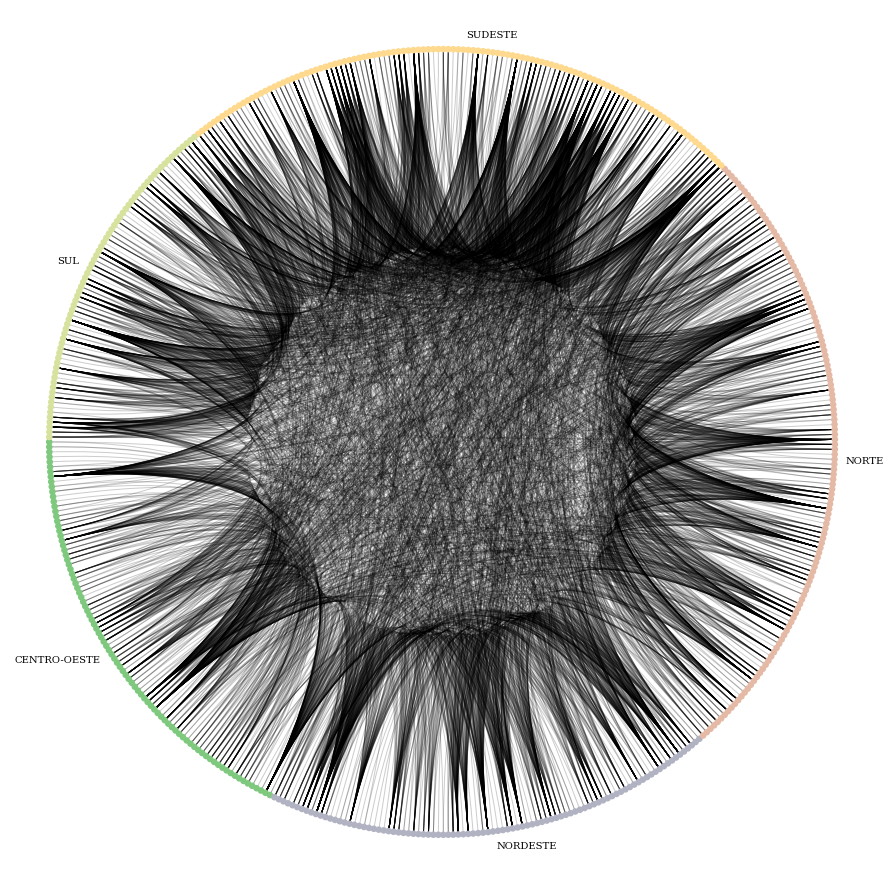

In [20]:
c = nv.CircosPlot(G_br,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(20,16))

c.draw()

# Assortividade de Degree

Analisando a assortividade de Degree podemos afirmar que os nós de baixo grau possuem mais links do que os nós de grau alto, conforme a celula abaixo.

In [21]:
nx.degree_assortativity_coefficient(G_br)

-0.2017097172979742

In [22]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_br).items())

degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)
print(degree)
print(avg_neigh_degree)

[10, 2, 151, 92, 3, 12, 8, 21, 83, 7, 18, 13, 11, 1, 4, 42, 15, 127, 46, 35, 96, 130, 34, 126, 23, 77, 14, 5, 59, 60, 22, 128, 19, 40, 6, 9, 0, 71, 29, 84, 44, 52, 31, 159, 115, 17, 20, 30, 45, 47, 24, 32, 25, 66, 167, 61, 26, 56, 16, 97, 87, 112, 39, 72, 36, 81, 62, 124, 137, 33, 119, 53, 49, 85, 89, 55, 28, 163, 79, 102, 48, 132, 50, 41]
[55.85625, 74.48461538461538, 44.28476821192053, 62.94565217391305, 71.74074074074075, 56.11904761904762, 65.08333333333333, 77.68253968253968, 62.626506024096386, 65.97142857142858, 63.870370370370374, 62.93706293706294, 62.04895104895105, 114.35616438356165, 69.80882352941177, 78.91269841269842, 71.88571428571429, 45.70866141732284, 69.01086956521739, 76.93809523809524, 57.458333333333336, 47.08461538461538, 66.88235294117646, 47.801587301587304, 46.57608695652174, 60.18181818181818, 67.0, 63.99, 69.22033898305085, 70.27777777777777, 85.54545454545455, 49.203125, 67.72631578947369, 72.49, 62.4537037037037, 64.05555555555556, 0, 68.16901408450704, 7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average neighbor degree')

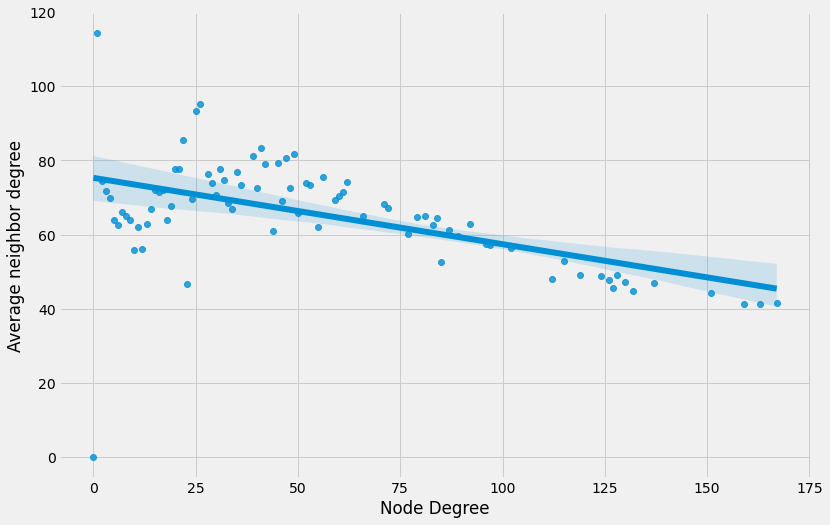

In [41]:
plt.style.use("fivethirtyeight")
fig, ax = plt.pyplot.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neighbor degree")

Observe que a medida que o grau do nó aumenta, a media dos graus vizinhos diminui, conforme é possivel observar no grafico acima!

Agora vamos analisar os Assotividade de Degree por região

## Norte

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


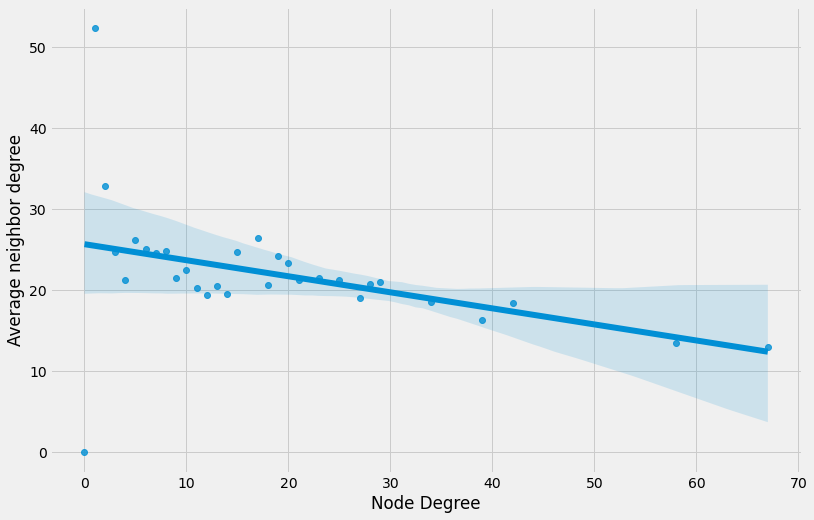

Degree assortativity coefficient: -0.22193985877089423


In [44]:
def regplotByRegion(G, region):
  aux_traffic = list(node[0] for node in G.nodes(data=True) if node[1]["region"] == region)
  G_aux = nx.subgraph(G, aux_traffic)

  degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_aux).items())

  degree = list(degree)
  avg_neigh_degree = list(avg_neigh_degree)

  plt.style.use("fivethirtyeight")
  fig, ax = plt.subplots(1,1,figsize=(12,8))

  sns.regplot(degree,avg_neigh_degree,ax=ax)

  ax.set_xlabel("Node Degree")
  ax.set_ylabel("Average neighbor degree")

  # Save figure
  plt.savefig(region+"_degree_assortativity.png",
              format="png",
              dpi=400,
              bbox_inches="tight",
              transparent=True)
  plt.show()

  print("Degree assortativity coefficient:", nx.degree_assortativity_coefficient(G_aux))

regplotByRegion(G_br, "NORTE")

## Nordeste 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


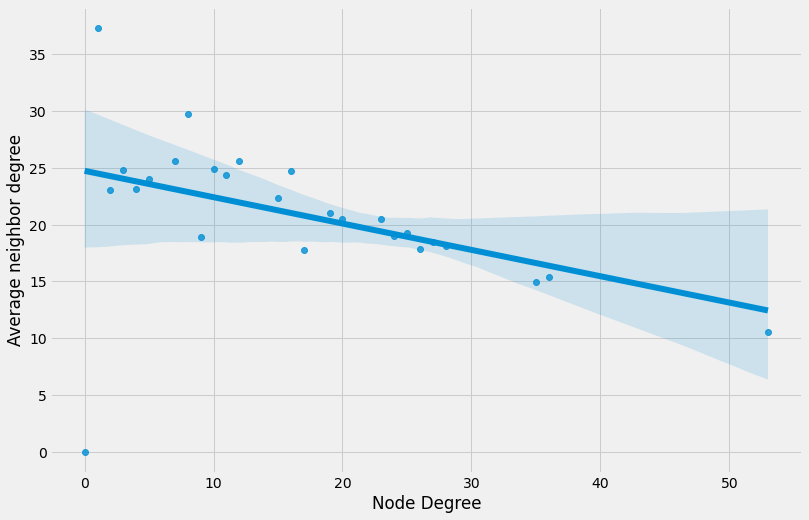

Degree assortativity coefficient: -0.33375735918340366


In [45]:
regplotByRegion(G_br, "NORDESTE")

## Sul

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


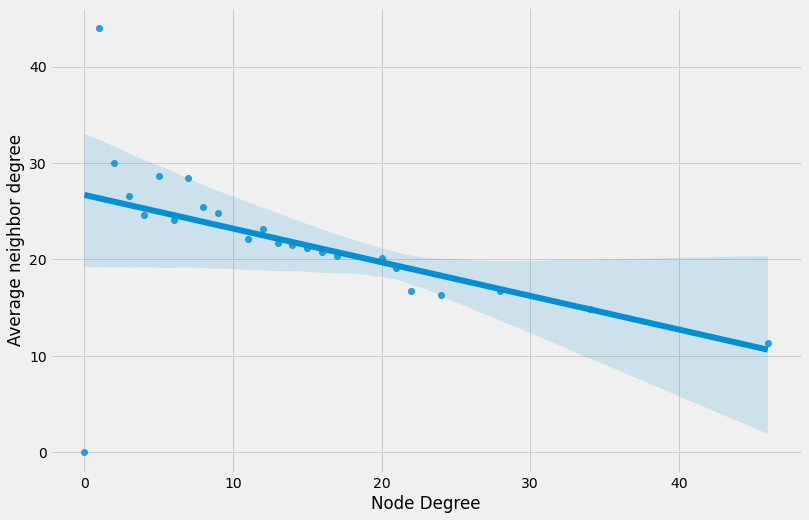

Degree assortativity coefficient: -0.40181381306857755


In [46]:
regplotByRegion(G_br, "SUL")

## Sudeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


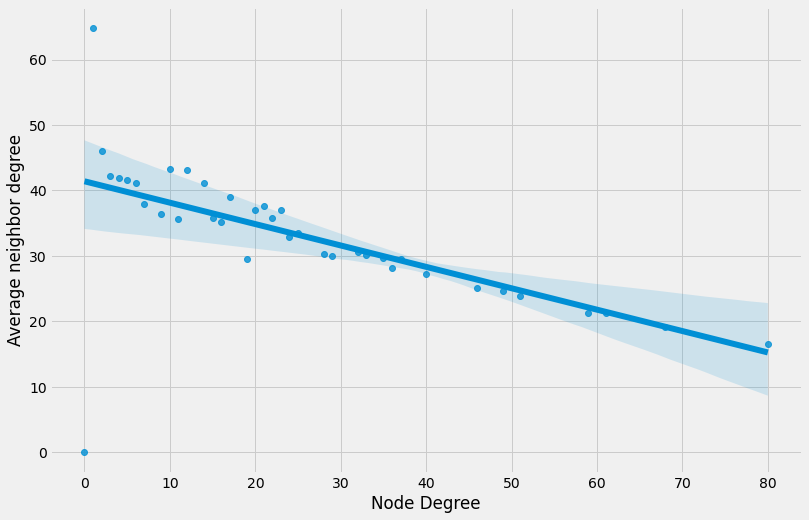

Degree assortativity coefficient: -0.3687746079424212


In [47]:
regplotByRegion(G_br, "SUDESTE")

## Centro-Oeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


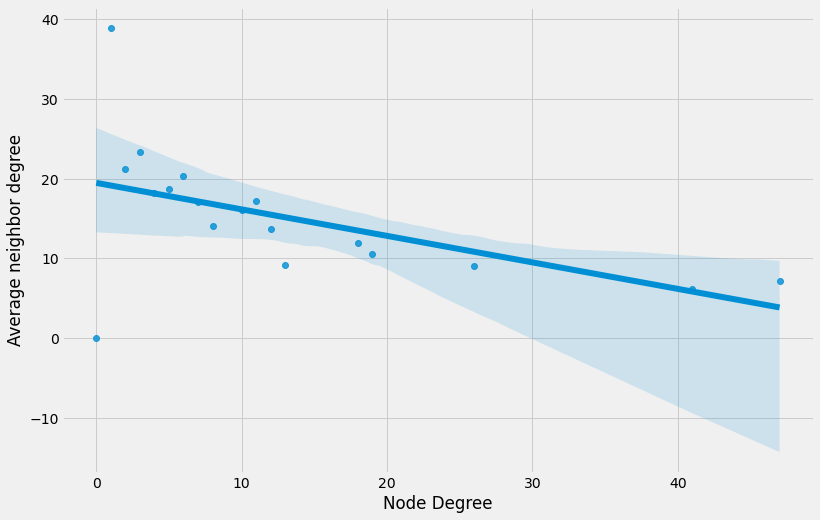

Degree assortativity coefficient: -0.3542839902086467


In [48]:

regplotByRegion(G_br, "CENTRO-OESTE")

Observe que a região sul tem o menor coeficiente de grau de assortatividade e é a região com os nós de maior grau, ou seja, são os nós da rede com maior número de conexões onde seus vizinhos possuem graus mais baixos.


 # Componentes conectados

Agoramos obsevar como os componentes estão conectados dentro da rede trafego aerea brasileira

In [49]:
nx.number_connected_components(G_br)

5

In [50]:
for component in nx.connected_components(G_br):
  print(len(component), component)

491 {'SNYA', 'SWYY', 'SSCP', 'SBKP', 'SBUL', 'SNDB', 'SNTF', 'SBGP', 'SNMZ', 'SWNH', 'SDVG', 'SBAM', 'SBFL', 'SBLP', 'SNOX', 'SDBK', 'SWAE', 'SBJE', 'SBST', 'SNWS', 'SWPD', 'SNKI', 'SWGN', 'SJQP', 'SNTS', 'SWWU', 'SJCW', 'SWDE', 'SNCX', 'SBIT', 'SWUY', 'SSVI', 'SSJA', 'SWIQ', 'SBCY', 'SNJD', 'SBIZ', 'SSEP', 'SBHT', 'SILJ', 'SBTC', 'SBLS', 'SWJQ', 'SBTV', 'SBRG', 'SWGP', 'SBVT', 'SBSV', 'SNPG', 'SNBA', 'SWCQ', 'SNBR', 'SNXB', 'SBTK', 'SWWA', 'SBPA', 'SWCB', 'SWUA', 'SBJR', 'SWZM', 'SBPV', 'SNTI', 'SBPO', 'SNLO', 'SIXE', 'SNAR', 'SWEI', 'SNBS', 'SJLM', 'SNBX', 'SSCT', 'SBCA', 'SNBW', 'SNUU', 'SBAS', 'SNJB', 'SNKB', 'SWJW', 'SSHZ', 'SDCO', 'SWYK', 'SNCT', 'SBMM', 'SIKC', 'SBJP', 'SBAA', 'SSTL', 'SBTR', 'SJTS', 'SNUH', 'SJTC', 'SDUB', 'SBGL', 'SNDC', 'SBDO', 'SNQW', 'SWHG', 'SNNC', 'SWOB', 'SNSG', 'SWSI', 'SNQX', 'SJDB', 'SWCI', 'SWRP', 'SDRS', 'SNIP', 'SWHP', 'SBMK', 'SBPJ', 'SWNS', 'SBMD', 'SBCX', 'SBAQ', 'SWPJ', 'SWGI', 'SBSJ', 'SBIH', 'SWFN', 'SBMG', 'SSNH', 'SWEU', 'SNAP', 'SBGV', 'SB

In [51]:
airports.loc[["SBER", "SSBE", "SNGR", "SNBG"], :]

,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
code,,,,,,,,
SBER,EIRUNEPÉ,AM,NORTE,BRASIL,AMÉRICA DO SUL,NaN,-6.663039999999967,-69.86730999999997
SSBE,CAMAPUÃ,MS,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.598400115966797,-54.02109909057617
SNGR,CUMARU DO NORTE,PA,NORTE,BRASIL,AMÉRICA DO SUL,NaN,-7.783610820770264,-51.133888244628906
SNBG,BAIXO GUANDU,ES,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.499000549316406,-41.04180145263672


In [52]:
G_conncomp =  nx.subgraph(G_br, list(nx.connected_components(G_br))[0])

norte = [node for node in G_conncomp.nodes(data=True) if node[1]["region"] == "NORTE"]
nordeste = [node for node in G_conncomp.nodes(data=True) if node[1]["region"] == "NORDESTE"]
sul = [node for node in G_conncomp.nodes(data=True) if node[1]["region"] == "SUL"]
sudeste = [node for node in G_conncomp.nodes(data=True) if node[1]["region"] == "SUDESTE"]
centro = [node for node in G_conncomp.nodes(data=True) if node[1]["region"] == "CENTRO-OESTE"]

print("Norte: %0.4f" % (len(norte)/G_conncomp.number_of_nodes()*100) + "%")
print("Nordeste: %0.4f" % (len(nordeste)/G_conncomp.number_of_nodes()*100) + "%")
print("Sul: %0.4f" % (len(sul)/G_conncomp.number_of_nodes()*100) + "%")
print("Sudeste: %0.4f" % (len(sudeste)/G_conncomp.number_of_nodes()*100) + "%")
print("Centro-Oeste: %0.4f" % (len(centro)/G_conncomp.number_of_nodes()*100) + "%")

Norte: 25.6619%
Nordeste: 18.7373%
Sul: 14.2566%
Sudeste: 23.4216%
Centro-Oeste: 17.9226%


#Cenários simulados

Nesta etapa, iremos simular algumas viagens entre as regiões do Brasil, levando em consideração a conexão entre as regiões e os aeroportos que existem no dataset. As viagens que devemos simular são as seguintes:
- Cidade no Norte (1) e uma cidade no Sul (2)
- Cidade no Sul (2) e uma cidade no Nordeste (3)
- Cidade no Nordeste (3) e uma cidade no Centro-Oeste (4)
- Cidade no Centro-Oeste (4) e uma cidade no Sudeste (5)

Para analizar o caminho mais curto para chegar ao destino, utilizaremos a função nx.shortest_path(), que nos auxiliará mostrando o nome de cada um dos aeroportos que será visitado durante a viagem.

In [53]:
# Aeroportos utilizados para o cenário simulado
airports.loc[["SBEG", "SBPA", "SBSG", "SBDO", "SBRJ"], :]

,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
code,,,,,,,,
SBEG,MANAUS,AM,NORTE,BRASIL,AMÉRICA DO SUL,NaN,-3.03861,-60.049702
SBPA,PORTO ALEGRE,RS,SUL,BRASIL,AMÉRICA DO SUL,NaN,-29.994400024414062,-51.1713981628418
SBSG,SÃO GONÇALO DO AMARANTE,RN,NORDESTE,BRASIL,AMÉRICA DO SUL,NaN,-5.768056,-35.376111
SBDO,DOURADOS,MS,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,NaN,-22.22856901507285,-54.73851941940339
SBRJ,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-22.910499572799996,-43.1631011963


In [54]:
# Manaus/AM para Porto Alegre/RS
nx.shortest_path(G_br, "SBEG", "SBPA")

['SBEG', 'SBPA']

Notamos que as cidades de Manaus e Porto Alegre não são cidades que estão na mesma região mas que podem ser visitadas a partir de um único voo.

In [55]:
# Porto Alegre/RS para São Gonçalo do Amarante/RN
nx.shortest_path(G_br, "SBPA", "SBSG")

['SBPA', 'SBSG']

Novamente, notamos que as cidades de Porto Alegre e São Gonçalo do Amarante não são cidades que estão na mesma região mas que podem ser visitadas a partir de um único voo.

In [56]:
# São Gonçalo do Amarante/RN para Dourados/MS
nx.shortest_path(G_br, "SBSG", "SBDO")

['SBSG', 'SBCF', 'SBDO']

Saindo de São Gonçalo do Amarante/RN para Dourados/MS, temos que fazer uma conexão no aeroporto de Confins. O aeroporto SBCF está localizado no estado de Minas Gerais, na região Sudeste, para ir do SBSG para o SBDO temos que fazer uma conexão nesse aeroporto, abaixo estão alguns detalhes da localização do aeroporto.

In [57]:
airports.loc["SBCF", :]

name                        CONFINS
state                            MG
region                      SUDESTE
country                      BRASIL
continent            AMÉRICA DO SUL
Código OACI                     NaN
lat_geo_point    -19.62444305419922
lon_geo_point    -43.97194290161133
Name: SBCF, dtype: object

In [58]:
# Dourados/MS para Rio de Janeiro/RJ
nx.shortest_path(G_br, "SBDO", "SBRJ")

['SBDO', 'SBCF', 'SBRJ']

Partindo de Dourados/MS para o Rio de Janeiro/RJ, notamos que o voo passa pelo aeroporto de Confins, também na região sudeste, para poder chegar ao seu destino final.

# Coeficiente de Clusterização

In [ ]:
nx.average_clustering(G_br)

In [60]:
nx.clustering(graph, ["SNAB","SBAC"])

{'SNAB': 0, 'SBAC': 1.0}

Analisando o subgraph de cada região do Brasil

In [61]:
norte = list(node[0] for node in G_br.nodes(data=True) if node[1]["region"] == "NORTE")
G_norte = nx.subgraph(G_br, norte)

print("The network has {} nodes and {} edges".format(G_norte.number_of_nodes(),
                                                     G_norte.number_of_edges()))

The network has 128 nodes and 598 edges


In [62]:
nordeste = list(node[0] for node in G_br.nodes(data=True) if node[1]["region"] == "NORDESTE")
G_nordeste = nx.subgraph(G_br, nordeste)

print("The network has {} nodes and {} edges".format(G_nordeste.number_of_nodes(),
                                                     G_nordeste.number_of_edges()))

The network has 92 nodes and 347 edges


In [63]:
sul = list(node[0] for node in G_br.nodes(data=True) if node[1]["region"] == "SUL")
G_sul = nx.subgraph(G_br, sul)

print("The network has {} nodes and {} edges".format(G_sul.number_of_nodes(),
                                                     G_sul.number_of_edges()))

The network has 70 nodes and 304 edges


In [64]:
sudeste = list(node[0] for node in G_br.nodes(data=True) if node[1]["region"] == "SUDESTE")
G_sudeste = nx.subgraph(G_br, sudeste)

print("The network has {} nodes and {} edges".format(G_sudeste.number_of_nodes(),
                                                     G_sudeste.number_of_edges()))

The network has 116 nodes and 768 edges


In [65]:
co = list(node[0] for node in G_br.nodes(data=True) if node[1]["region"] == "CENTRO-OESTE")
G_co = nx.subgraph(G_br, co)

print("The network has {} nodes and {} edges".format(G_co.number_of_nodes(),
                                                     G_co.number_of_edges()))

The network has 89 nodes and 230 edges


Analisando o coeficiente de clustering de cada região do Brasil

In [66]:
nx.average_clustering(G_norte)

0.6159653188854736

In [67]:
nx.average_clustering(G_nordeste)

0.43807384418290296

In [68]:
nx.average_clustering(G_sul)

0.5979416718387068

In [69]:
nx.average_clustering(G_sudeste)

0.6186700538769275

In [70]:
nx.average_clustering(G_co)

0.5618772358860068

A região nordeste possui o menor índice de clusterização dentre todas as outras regiões, podemos afirmar que, como ela está mais próximo do valor 0, a sua organização da malha aérea se aproxima da topologia estrela.